# Physics 300 
## Computational Physics I (Fall 2017)
## BPB-248, Tues/Thurs 10:00 - 11:15 am 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Tues/Thurs 8:30 - 10:00 |

# 16 Random Number (II)

It happens frequently when writing computer programs for physics calculations that you want some even to take place randomly
with a probability $p$. For instance, with probability 0.2, you want a particle to move, otherwise not.
This kind of behavior is straightforward to create.

```python
from random import random
if random()<0.2:
    print("Move")
else:
    print("Stay")
```

## 16.1 Bownian Motion
Brownian motion is the motion of a particle, such as a smoke or dust paticle, in a gas, as it is buffered by random collisions
with gas molecules. Make a simple computer simulation of such a particle in two dimensions as follows.

- 1, __Initilization__. The particle is confined to a square grid or lattice L\*L squares on a side, so that its poistion can be represented by two integers i,j = 0 ... L-1. It starts in the middle of the grid. 
- 2, __Random Walk__. On each step of the simulation, choose a random direction - up, down, left, or right - and move the particle one step in that direction
- 3, __Boundary condition__. If the particle goes outside the limits of the lattice, reject it, and choose a new random direction.

Write a program to perform a 1000 steps of this proces on a lattice with $L$ = 101.


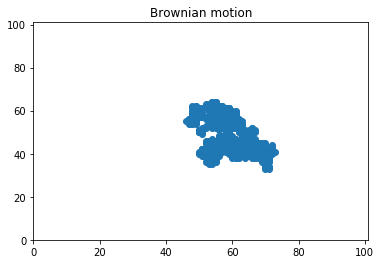

In [1]:
# Brownian Motion
import numpy as np
import matplotlib.pyplot as plt

# init
L1 = 101
L2 = 101
N = 1000

position = np.empty([N,2])
position[0,0] = int(L1/2)
position[0,1] = int(L2/2)
direction = np.array([[0,1],[0,-1],[1,0],[-1,0]])

# random walk
for i in range(1,N):
    position1 = [-1,-1]
    
    while min(position1)<0 or position1[0] >L1 or position1[1] >L2:
        move = np.random.randint(len(direction))
        position1 = position[i-1,:] + direction[move]
        
    position[i,:] = position1
plt.xlim(0,101)
plt.ylim(0,101)
plt.title('Brownian motion')
plt.plot(position[:,0], position[:,1], '-o')        
plt.show()

## 16.2 Non-uniform Random Numbers

All the python random number functions we have decribed generate uniformly distributed random numbers - all values that can 
be returned by these functions occur with equal probability. In physics, however, there are many processes that happen
with nonuniform probability. 

### 16.2.1 Decay of an isotope
The radioisotope $^{201}$Tl decays to $^{208}$ with a half-life of 3.053 minutes. Suppose we start with a sample of 1000 thallium atoms. Let us simulate the decay of these atoms over time, mimicking the randomness of that decay using random numbers.

On average we know that the number N of atoms in our sample will fall off exponentially over time according to the standard equation of radioactive decay:
$$ N(t) = N(0) 2^{-t/\tau}$$

where $\tau$ is the half-life. Then the fraction of atoms remaining after time $t$ is 

$$N(t)/N(0) = 2^{-t/\tau}$$

Which means the probability $p(t)$ that any particular single atom has decayed is:

$$p(t)=1-2^{-t/\tau}$$

Simulate the decay process as a function of time.


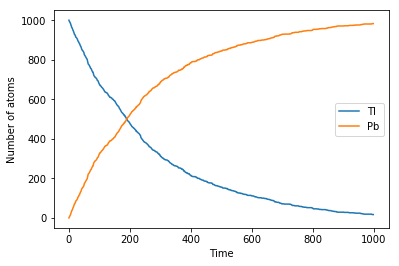

In [2]:
## Decay process
import numpy as np
import matplotlib.pyplot as plt


# Initial parameters
NTl = 1000
NPb = 0
tau = 3.053*60
dt = 1 
p = 1 - 2**(-dt/tau)
tmax = 1000

t_points = np.arange(0.0, tmax, dt)
Tl = []
Pb = []

for t in t_points:
    Tl.append(NTl)
    Pb.append(NPb)
    
    # Calculate the decayed atoms
    decay = 0
    for i in range(NTl):
        if np.random.random()<p:
            decay += 1
    NTl -= decay
    NPb += decay

plt.plot(t_points, Tl, label='Tl')
plt.plot(t_points, Pb, label='Pb')
plt.xlabel("Time")
plt.ylabel("Number of atoms")
plt.legend()
plt.show()


As shown in the above, the probability that a atom decays in time $t$ is $1-2^{-t/\tau}$, and hence the probability that it decays in a time interval $dt$ is
$$1-2^{-dt/\tau} = 1-\exp(-\frac{dt}{\tau}\text{ln}2) = \frac{\text{ln}2}{\tau}dt$$

Then we calculate the total probability of decaying an atom between $t$ and $t+dt$. In order to undergo such a decay,
an atom must survive without decay untile time t, which happens with $p=2^{-t/\tau}$, and then decay in dt interval$:

$$P(t)dt = 2^{-t/\tau}\frac{\text{ln}2}{\tau}dt$$

This is an example of non-uniform probability distribution. The decay times t are distributed in proportion to $2^{-t/\tau}$, 
so that ealier decay times are more probable than late ones.

A more efficient way to calculate the decay of a sample is to generate N random numbers from this non-uniform probability distribution, to represent the time at which each of the atom decays. Then creating curves as a function of timi, is simply a
matter of counting how many of the atoms decay before any given time.

It is possible to generate non-uniform random numbers from a wide range of different distributions, including the exponential distribution, using the previous method. If you already have a source of uniform random numbers, one could turn them into nonuniform ones using some transformation methods.

Suppose you have a source of random floating numbers z from a distribution with a probability of q(z). And supposed that you have a function x(z). Then when z is one of our random numbers, x(z) is also a random number, but it will have different distribution according to x(z). 

$$p(x)dx = q(z)dz$$
$$\int_{-\infty}^{x(z)} p(x')dx' = \int_0^z dz'=z$$

As an example, suppose we want to integrate random real numbers x in the interval from zero to infinity with the exponential probability distribution

$$p(x)=\mu e^{-\mu x}$$

The leading factor of $\mu$ is necessary to make the distribution properly normalized. This is the same distribution that in the radioactive decay problem above, where $\mu=\text{ln}2/\tau$.

For this distribution,
$$\mu \int_0^{x(z)} e^{-\mu x'} dx' = 1-e^{-\mu x} = z$$

Therefore,

$$x = \frac{1}{\mu}\text{ln}(1-z)$$

So all we need is to generate uniform random numbers z in the interval from zero to one and feed them into this equation to get exponentially distributed x values.

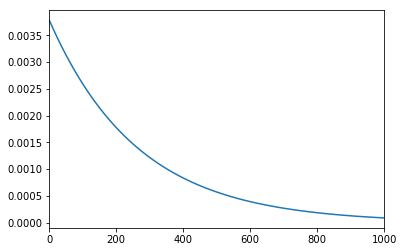

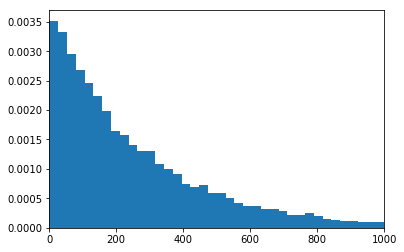

In [4]:
# To generate the exponential distribution from uniform distribution
import numpy as np
import matplotlib.pyplot as plt

tau = 3.053*60
t = np.linspace(0,1000,100)
y = 2**(-t/tau)*np.log(2)/tau
plt.plot(t,y)
plt.xlim(0,1000)
plt.show()

N = 10000
mu = np.log(2)/tau
x = []
for i in range(N):
    z0 = np.random.random()
    x.append(-np.log(1-z0)/mu)

plt.hist(x,100, normed=1)
plt.xlim(0,1000)
plt.show()

## 16.4 Homework
- 1, Import the visual package in python to make an animation on the screen of the position of the particle in Brownian motion.
- 2, rewrite the radioactive decay, to generate 1000 random numbers following the non-uniformed distribution.